In [22]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression

sns.set_theme()
plt.rc('font', family='Comic Sans MS')
sns.set_palette("Set2")


# USB sticks

We model the relationship between capacity and resulting price using linear regression.

In [23]:
usb = pd.DataFrame({
    "capacity": [16, 32, 64, 128, 256], 
    "price": [6, 6.5, 8.5, 14, 28]
})
usb

,capacity,price
0,16,6.0
1,32,6.5
2,64,8.5
3,128,14.0
4,256,28.0


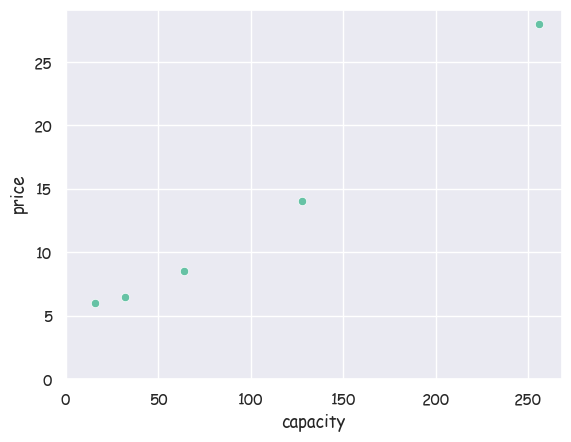

In [24]:
fig, ax = plt.subplots()
sns.scatterplot(usb, x="capacity", y="price", ax = ax)
ax.set(xlim = (0, None), ylim=(0, None))
plt.show()

The relationship is clearly linear, so that modeling using linear regression is appropriate.
First, we construct an instance of the LinearRegression class. 
(detailed documentation at https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html )

In [17]:
model = LinearRegression()

Now you have to train the model on the training data. 
All models in `scikit-learn` have a `fit()` function for this purpose. 
This function is usually passed the samples `X` and the corresponding labels `y`.
Usually `X` is an entire matrix of shape `(number_samples, number_features)` and `y` is a vector of the length `number_samples`.

In [ ]:
model.fit(X=usb[["capacity"]], y=usb["price"])  # two brackets to turn it into dataframe, instead of a series

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [25]:
model.intercept_
model.coef_
print("Offset: ", model.intercept_)
print("Slope: ", model.coef_[0])

Offset:  3.3333333333333375
Slope:  0.0934139784946236


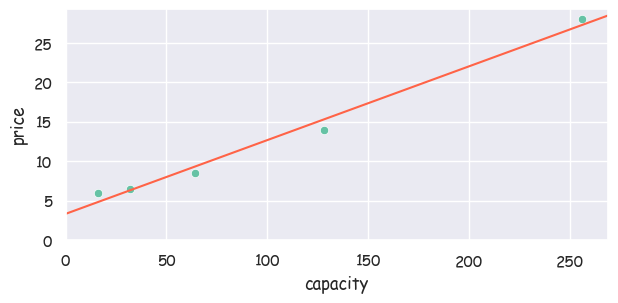

In [29]:
fig, ax = plt.subplots(figsize=(7,3))
sns.scatterplot(usb, x="capacity", y="price", ax = ax)
ax.axline(xy1=(0, model.intercept_), slope=model.coef_[0], color="tomato")
ax.set(xlim = (0, None), ylim=(0, None))
plt.show()

In [30]:
model.predict(X=usb[["capacity"]])

array([ 4.82795699,  6.32258065,  9.31182796, 15.29032258, 27.24731183])

# TIPS data set

Modeling the relationship between total bill amount and tip amount using linear regression.

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

In [31]:
tips = sns.load_dataset("tips")
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


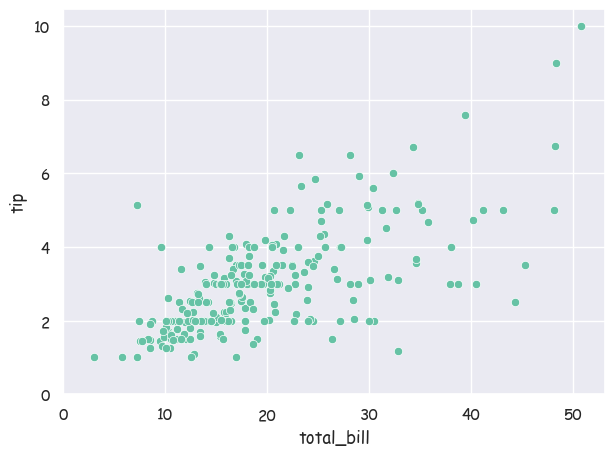

In [34]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(tips, x="total_bill", y="tip", ax = ax)
ax.set(xlim = (0, None), ylim = (0, None))
plt.show()

In [32]:
model_tips = LinearRegression()

In [35]:
model_tips.fit(X=tips[["total_bill"]], y=tips["tip"])

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [38]:
print("Offset: ", model_tips.intercept_)
print("Slope: ", model_tips.coef_[0])

Offset:  0.920269613554674
Slope:  0.10502451738435332


We see that according to the model, the tip amount is about 10% of the total bill plus almost an additional dollar.

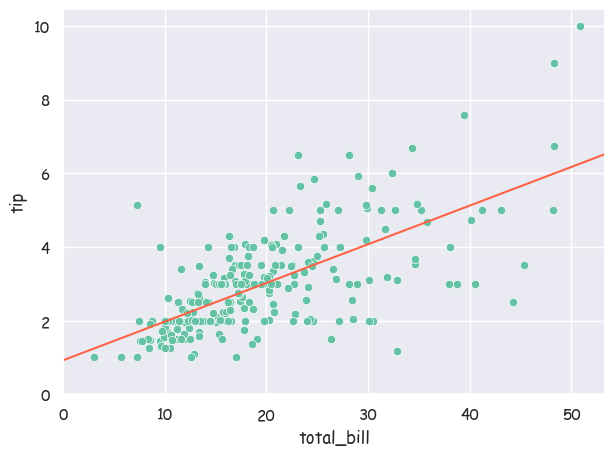

In [37]:
fig, ax = plt.subplots(figsize=(7,5))
sns.scatterplot(tips, x="total_bill", y="tip", ax = ax)
ax.axline(xy1 = (0, model_tips.intercept_), slope = model_tips.coef_[0], color="tomato")
ax.set(xlim = (0, None), ylim = (0, None))
plt.show()

The trained model can also be used directly for prediction using `predict()` and applied to new X values without a label. 

Or you can calculate the respective model prediction for all samples (i.e. for all original data) and determine the residuals (i.e. the difference to the actual y-value).